# scikit-learn
### 决策树

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=0)
y_train

array([0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0,
       1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2])

In [4]:
clf = tree.DecisionTreeClassifier(random_state=50
                                 ,splitter='random'
                                 )  # 实例化决策树模型
clf = clf.fit(X_train, y_train)  # 训练
result = clf.score(X_test, y_test)  # 导入测试集，输出分类结果
result  # 分类精度

0.8888888888888888

In [5]:
[*zip(wine.feature_names, clf.feature_importances_)]  # 特征重要性

[('alcohol', 0.0),
 ('malic_acid', 0.032461646727656585),
 ('ash', 0.016288998357963873),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.023269997654234112),
 ('total_phenols', 0.007167159277504099),
 ('flavanoids', 0.02617874736101337),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0348333964885689),
 ('color_intensity', 0.3149699955217196),
 ('hue', 0.05282468467493094),
 ('od280/od315_of_diluted_wines', 0.1316200427924566),
 ('proline', 0.3603853311439519)]

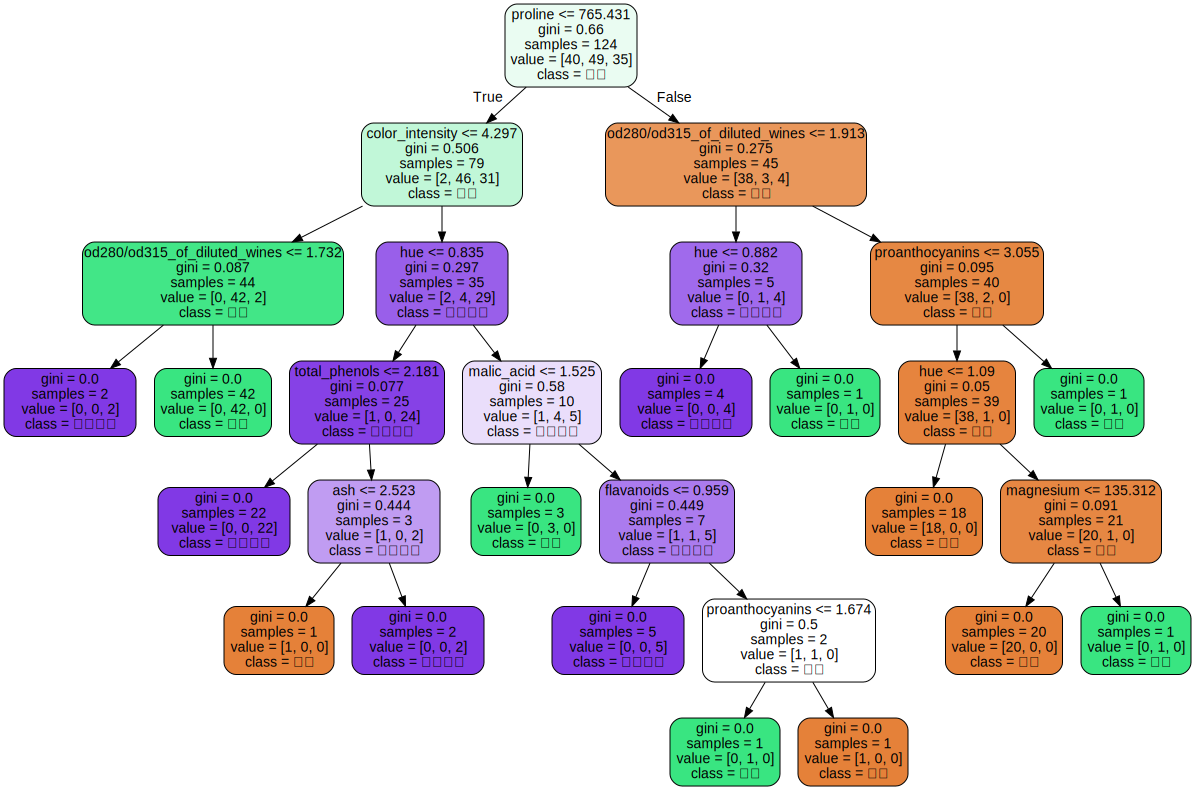

In [6]:
import graphviz
plot_data = tree.export_graphviz(clf
                                 ,feature_names=wine.feature_names
                                 ,class_names=['琴酒', '雪莉', '贝尔摩德']
                                 ,filled=True  # 颜色填充
                                 ,rounded=True  # 圆角框
                                )
graph = graphviz.Source(plot_data)
graph

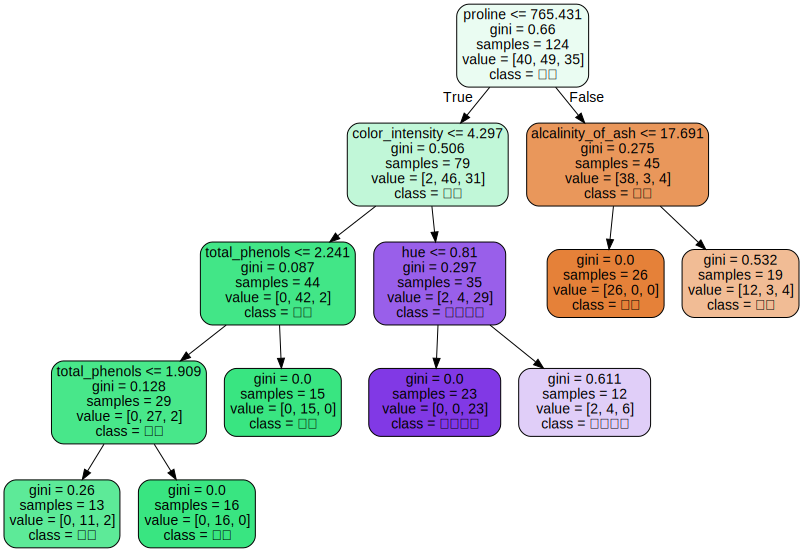

In [7]:
# max_depth, min_samples_leaf, min_samples_split
clf = tree.DecisionTreeClassifier(random_state=50
                                 ,splitter='random'
                                 ,max_depth=4
                                 ,min_samples_leaf=10
                                 ,min_samples_split=10
                                 )  # 实例化决策树模型
clf = clf.fit(X_train, y_train)  # 训练
result = clf.score(X_test, y_test)  # 导入测试集，输出分类结果

plot_data = tree.export_graphviz(clf
                                 ,feature_names=wine.feature_names
                                 ,class_names=['琴酒', '雪莉', '贝尔摩德']
                                 ,filled=True  # 颜色填充
                                 ,rounded=True  # 圆角框
                                )
graph = graphviz.Source(plot_data)
graph

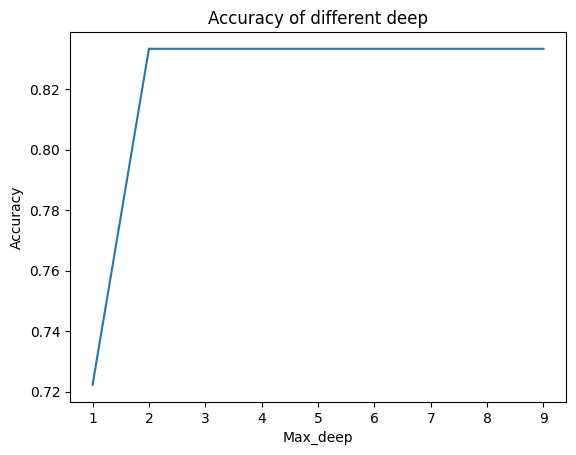

In [8]:
import matplotlib.pyplot as plt
score = []
for deep in range(1, 10):
    clf = tree.DecisionTreeClassifier(random_state=50
                                 ,splitter='random'
                                 ,max_depth=deep
                                 ,min_samples_leaf=10
                                 ,min_samples_split=10
                                 )  # 实例化决策树模型
    clf = clf.fit(X_train, y_train)  # 训练
    result = clf.score(X_test, y_test)  # 导入测试集，输出分类结果  
    score.append(result)
plt.plot(range(1, 10), score)
plt.title('Accuracy of different deep')
plt.xlabel('Max_deep')
plt.ylabel('Accuracy')
plt.show();

In [9]:
clf.apply(X_test)  # 数据对应树上的位置

array([11,  8,  9, 12,  6,  9, 11,  8,  4,  4, 12,  8, 11,  9,  8,  6, 12,
       11,  9, 11,  9, 12,  9,  5,  5,  6,  6,  4,  4,  8, 11, 11,  5, 12,
       11, 11,  9,  4,  6,  8, 12, 12,  6,  4,  6, 11,  8, 12, 12, 12,  8,
        8, 11,  8], dtype=int64)

In [10]:
clf.predict(X_test)  # 预测未知参数

array([0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 0,
       2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 0, 0, 0, 2, 2, 0, 2])

### 随机森林

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(criterion='entropy'
                             ,random_state=0
                            )
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=0)
clf = clf.fit(X_train, y_train)
rfc = rfc.fit(X_train, y_train)
score_c = clf.score(X_test, y_test)
score_r = clf.score(X_test, y_test)
print('score_c:{}, score_r:{}'.format(score_c, score_r))

score_c:0.9444444444444444, score_r:0.9444444444444444


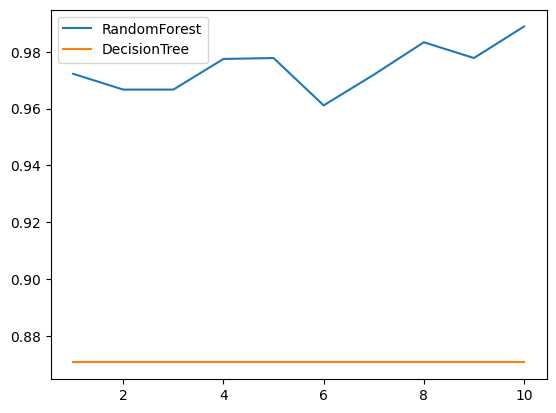

In [27]:
# 10折交叉验证，观察效果(进行10次)
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=25)  # 25棵树
clf = DecisionTreeClassifier(random_state=0)
clf_I, rfc_I = [], []
for i in range(10):
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_I.append(clf_s)
    rfc_I.append(rfc_s)
plt.plot(range(1, 11), rfc_I, label='RandomForest')
plt.plot(range(1, 11), clf_I, label='DecisionTree')
plt.legend()
plt.show()